STA365 Homework 2 (Markus Kangur)

PART 1

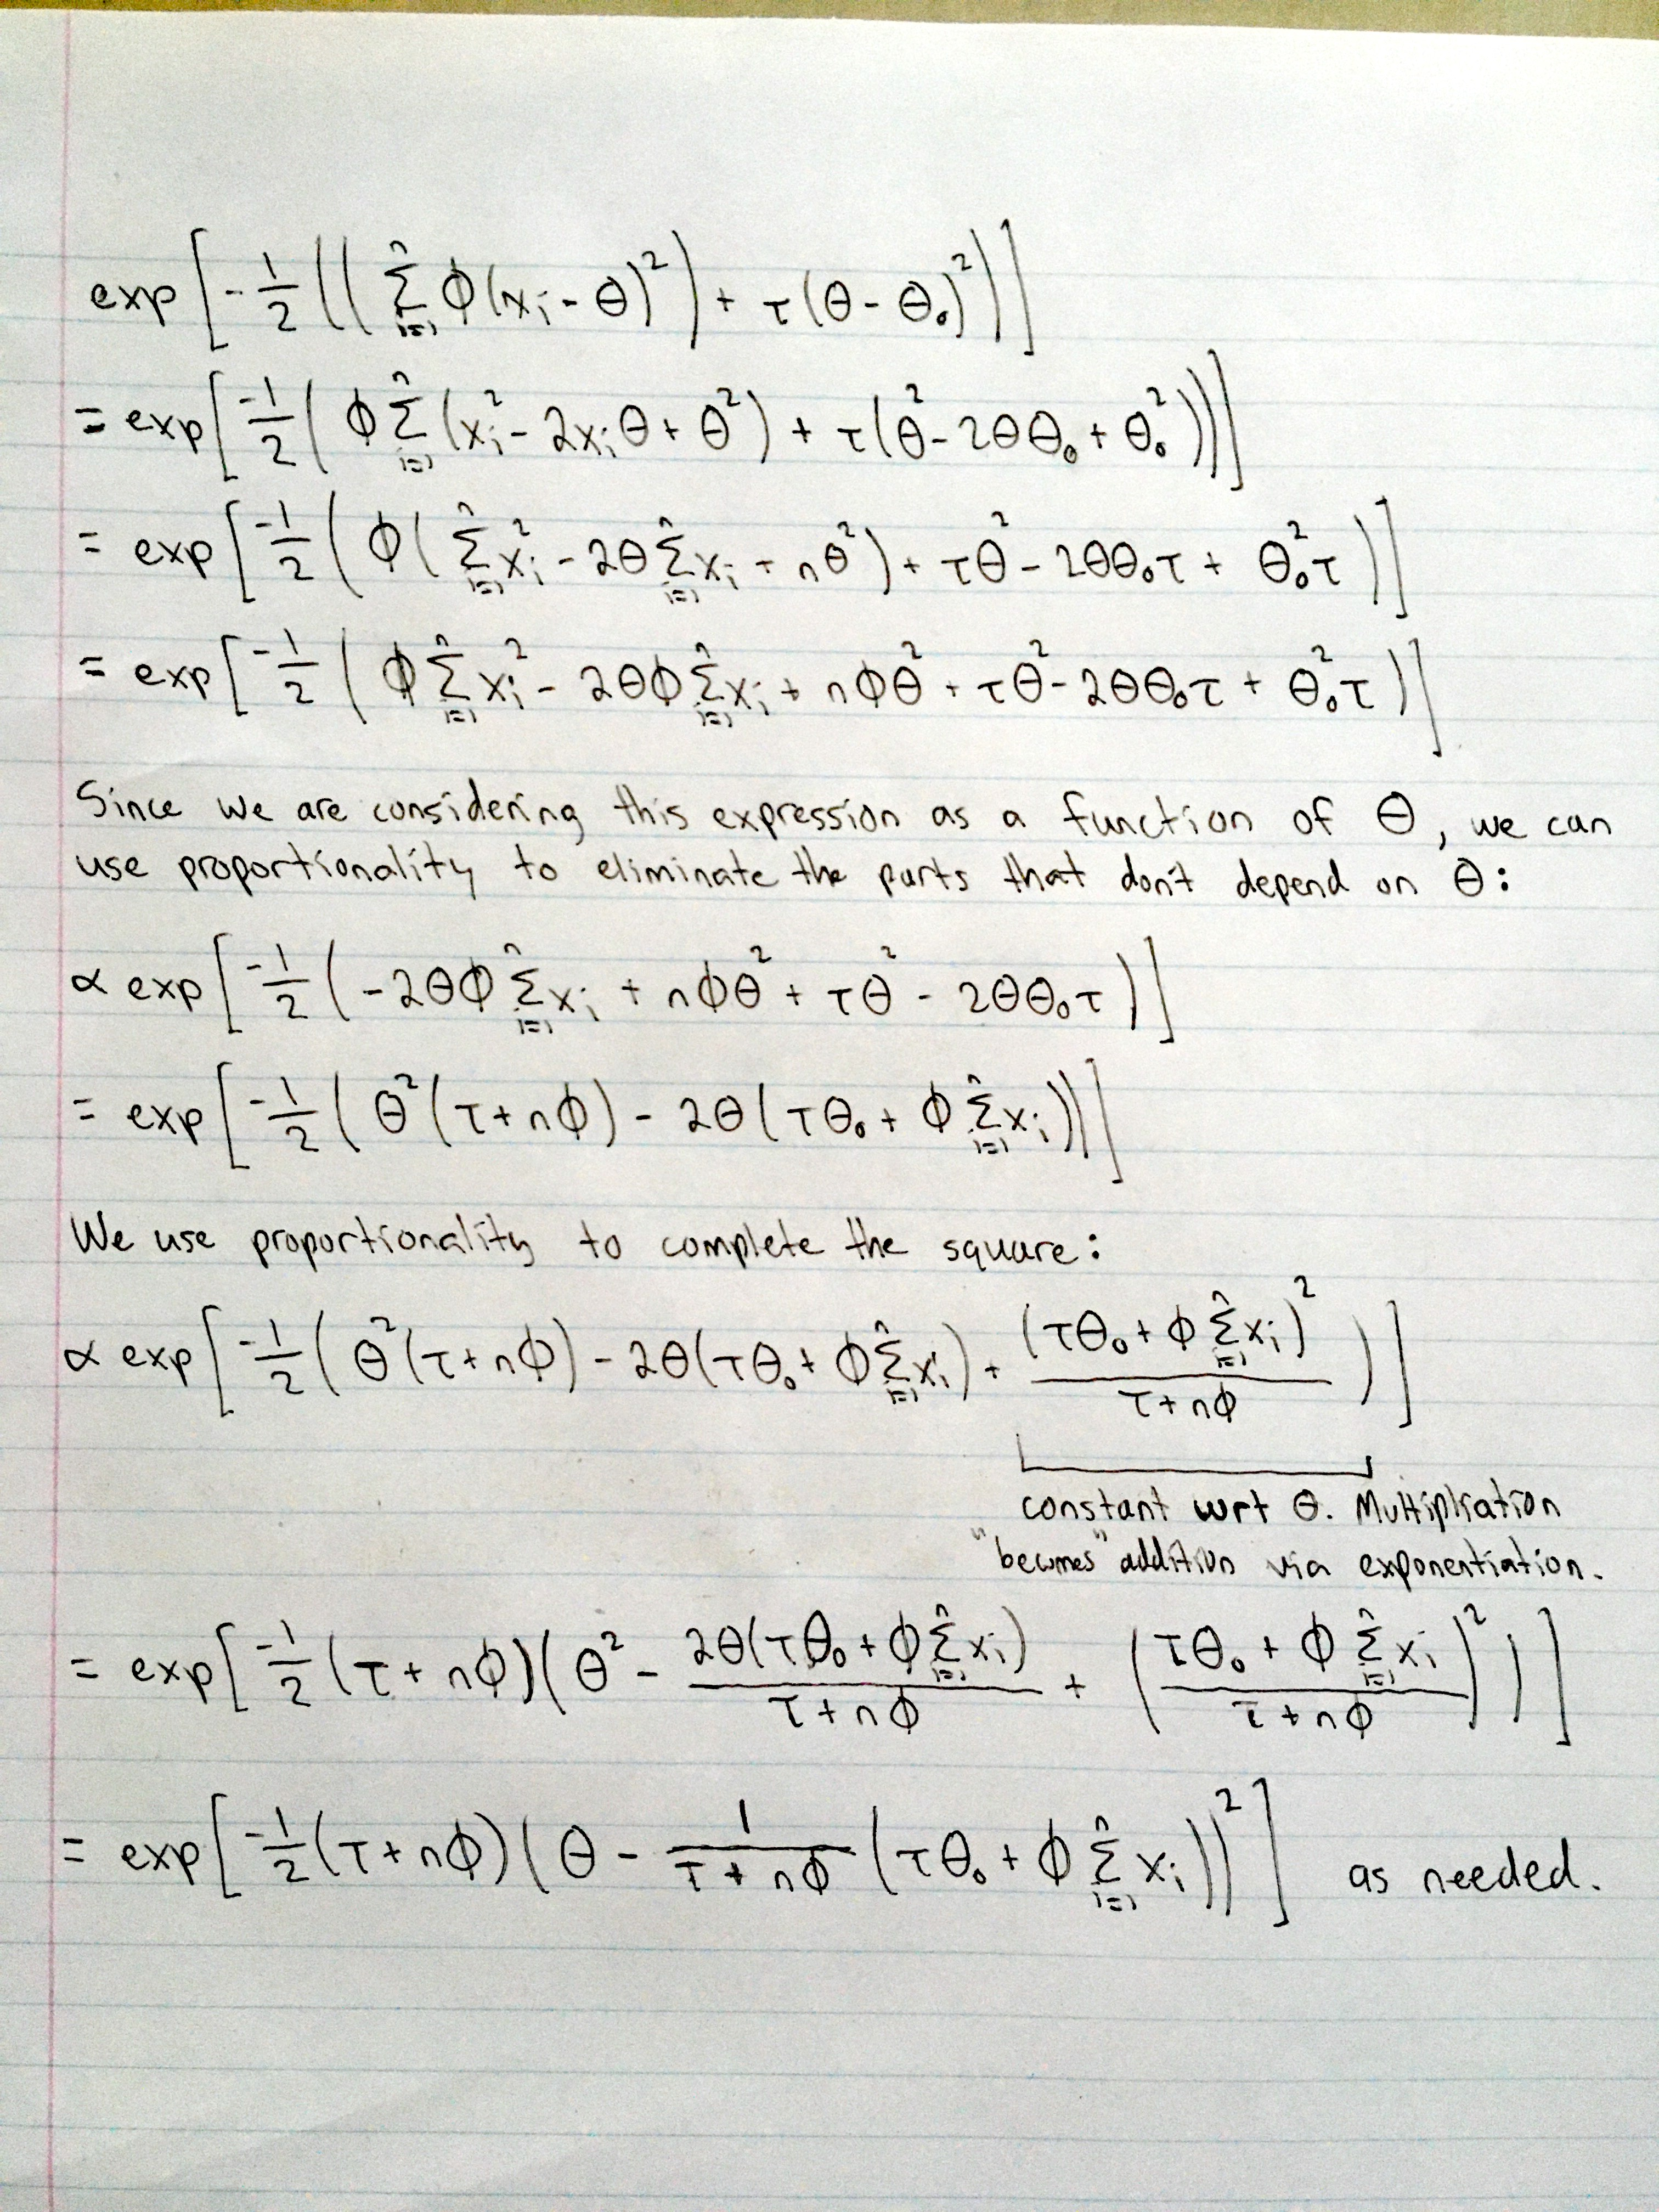

PART 2

In [34]:
# Import dependencies
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

Q1. The Classic Bayes Figure With Individual Likelihoods

Text(0.5, 1.0, 'Classic Bayes with Individual Likelihoods')

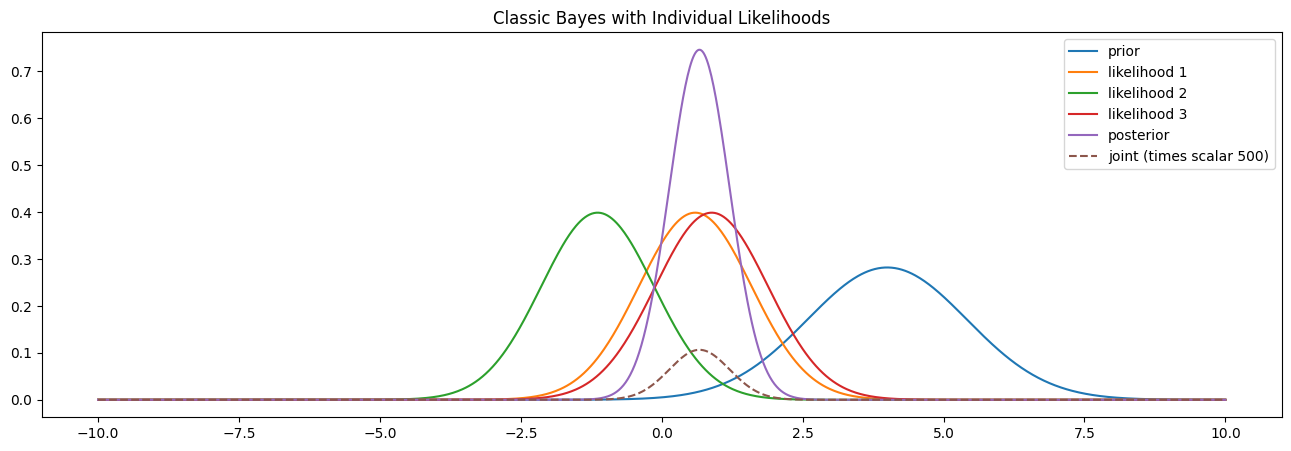

In [128]:
# Initialize
n = 3
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)
plt.figure(figsize=(16,5))

# Define and plot prior
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).pdf(parameter_domain)
plt.plot(parameter_domain, prior, label="prior")

# Stores each observation
lst = []

# Plot each individual likelihood curve
for i in range(n):
  x = stats.norm(loc=0,scale=1).rvs(1)
  likelihood = stats.norm.pdf(x, loc = parameter_domain, scale=1)
  plt.plot(parameter_domain, likelihood, label="likelihood "+str(i+1))
  lst.append(x)

# Convert observations to numpy array
x = np.array(lst).reshape(n)

# Compute joint and posterior
overall_likelihood = stats.norm.pdf((x[:,np.newaxis])*np.ones(parameter_domain.shape),
                            loc=parameter_domain, scale=1).prod(axis=0)
joint = 500 * overall_likelihood * prior
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).pdf(parameter_domain)

# Final plotting
plt.plot(parameter_domain, posterior, label="posterior")
plt.plot(parameter_domain, joint, linestyle="--", label="joint (times scalar "+str(c)+")")
plt.legend()
plt.title("Classic Bayes with Individual Likelihoods")

Q2. Classic Bayes figure on a log scale

Text(0.5, 1.0, 'Classic Bayes with Individual Likelihoods')

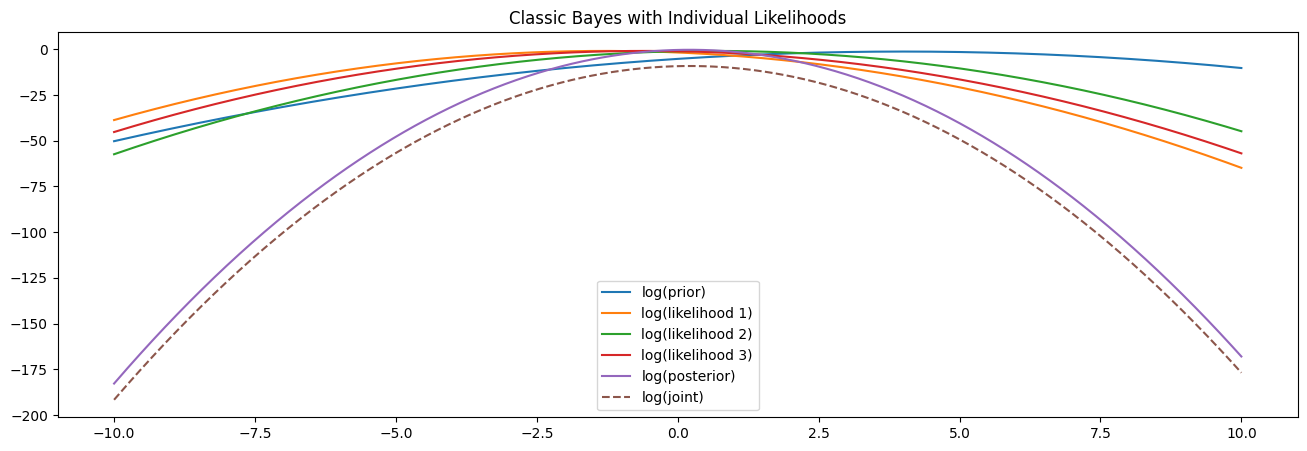

In [133]:
# Initialize
n = 3
theta_0,tau = 4,1/2
parameter_domain = np.linspace(-10,10,1001)
plt.figure(figsize=(16,5))

# Define and plot prior
prior = stats.norm(loc=theta_0, scale=1/tau**0.5).logpdf(parameter_domain) # log pdf
plt.plot(parameter_domain, prior, label="log(prior)")

# Stores each observation
lst = []

# Plot each individual likelihood curve
for i in range(n):
  x = stats.norm(loc=0,scale=1).rvs(1)
  likelihood = stats.norm.logpdf(x, loc = parameter_domain, scale=1) # log pdf
  plt.plot(parameter_domain, likelihood, label="log(likelihood "+str(i+1)+")")
  lst.append(x)

# Convert observations to numpy array
x = np.array(lst).reshape(n)

# Compute joint and posterior
overall_likelihood = stats.norm.logpdf((x[:,np.newaxis])*np.ones(parameter_domain.shape),
                            loc=parameter_domain, scale=1).sum(axis=0) # sum, not product
joint = overall_likelihood + prior # sum, not product
posterior = stats.norm(loc=(tau*theta_0+x.sum())/(tau+n), scale=1/(tau+n)**0.5).logpdf(parameter_domain) # log pdf

# Final plotting
plt.plot(parameter_domain, posterior, label="log(posterior)")
plt.plot(parameter_domain, joint, linestyle="--", label="log(joint)")
plt.legend()
plt.title("Classic Bayes with Individual Likelihoods")

Notice that log(joint) is just the log(posterior), but shifted!

Q3. The posterior distribution of a normal likelihood with prior $p(θ) \propto 1$ is again a normal distribution.



$p(\theta|x) \propto p(x|\theta)p(\theta) \propto \prod_{i-1}^{n} \sqrt{\frac{\phi}{2\pi}}e^{\frac{-\phi}{2}(x_i-\theta)^2} \propto exp(\frac{-\phi}{2}\sum_{i=1}^{n}(x_i-\theta)^2) = exp(\frac{-\phi}{2}(\sum_{i=1}^{n}x_i^2 -2\theta\sum_{i=1}^{n}x_i + n\theta^2))$

We can remove the term that doesn't depend on $\theta$ and complete the square using proportionality:

$\propto exp(\frac{-n\phi}{2}(\theta^2 -2\frac{\theta}{n}\sum_{i=1}^{n}x_i + (\frac{\sum_{i=1}^{n}x_i}{n})^2)) = exp(\frac{-n\phi}{2}(\theta - \sum_{i=1}^{n}\frac{x_i}{n})^2)$

This is the kernel of a normal distribution with mean $\sum_{i=1}^{n}\frac{x_i}{n}$ and precision $n\phi$.

Q4. Suppose we have a normal likelihood with an improper prior where $p(\theta) \propto 1$. Then we know the likelihood is proportional to both the joint and the posterior.

Therefore the posterior is just the likelihood times a normalizing constant. To make the likelihood integrate to 1, divide by its integral over the possible values of $\theta$, namely $\int_{-\infty}^{\infty}p(x|\theta)d\theta$. Therefore the posterior is the likelihood divided by the marginal likelihood constant.

Translating this to logarithms, log(posterior) is equal to log(likelihood) subtract log(marginal likelihood constant).